In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [2]:


img = cv2.imread('Sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobelxx = cv2.Sobel(sobelx,cv2.CV_64F,1,0,ksize=5)
sobelyy = cv2.Sobel(sobely,cv2.CV_64F,1,0,ksize=5)
sobelxxx = cv2.Sobel(sobelxx,cv2.CV_64F,1,0,ksize=5)
sobelyyy = cv2.Sobel(sobelyy,cv2.CV_64F,1,0,ksize=5)



(Text(0.5,1,'Original'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

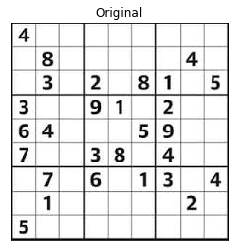

In [3]:
plt.subplot(1,1,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

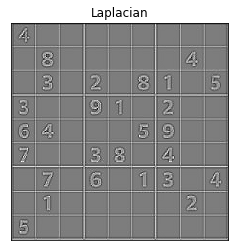

In [4]:
plt.subplot(1,1,1),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

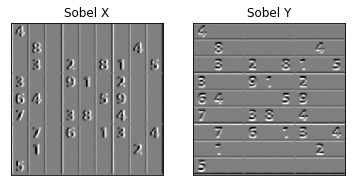

In [5]:

plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])


plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Sobel YY'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

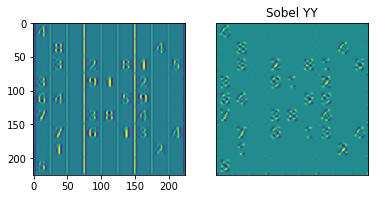

In [6]:
plt.subplot(1,2,1),plt.imshow(sobelxx)

plt.subplot(1,2,2),plt.imshow(sobelyy)
plt.title('Sobel YY'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Sobel YYY'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

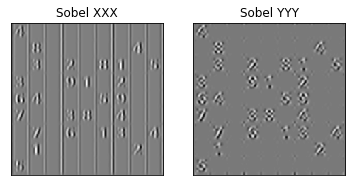

In [7]:
plt.subplot(1,2,1),plt.imshow(sobelxxx,cmap = 'gray')
plt.title('Sobel XXX'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(sobelyyy,cmap = 'gray')
plt.title('Sobel YYY'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Original'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

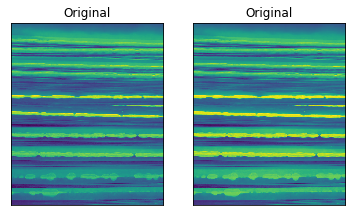

In [8]:
img = cv2.imread('edges.jpg')
img=img.sum(axis=2)
# img.shape
plt.subplot(1,2,1),plt.imshow(img/3)
plt.title('Original'), plt.xticks([]), plt.yticks([])
img = cv2.imread('edges.jpg',0)
plt.subplot(1,2,2),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])

## Color Ranging in RGB
Implement colour ranging operation in RGB space on colour images. The inputs for your operation are a colour image and a colour range specification as r_c, r_bw, g_c, g_bw, b_c, b_bw where r_c stands for red colour value, r_bw is the width of the range, i.e., colours between r_c - r_bw and r_c + r_bw must be retained in the image and all other 'r' values should be set to 0. The other parameters are for green and blue colours. You should handle errors when values go out of range.


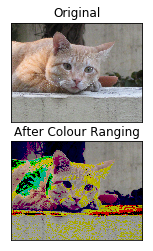

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.colors import rgb_to_hsv


def color_ranging_rgb(img, r_c, r_bw, g_c, g_bw, b_c, b_bw):
    r1, r2 = get_range_values_rgb(r_c, r_bw)
    g1, g2 = get_range_values_rgb(g_c, g_bw)
    b1, b2 = get_range_values_rgb(b_c, b_bw)
    vectorize_ranging = np.vectorize(ranging)
    shape = img.shape
    new_img = np.zeros(shape[0]*shape[1]*shape[2]
                       ).reshape(shape[0], shape[1], shape[2])
    new_img[:, :, 0] = vectorize_ranging(img[:, :, 0], r1, r2)
    new_img[:, :, 1] = vectorize_ranging(img[:, :, 1], g1, g2)
    new_img[:, :, 2] = vectorize_ranging(img[:, :, 2], b1, b2)
    return new_img
    
def plot_images(old_image, new_image):
    plt.subplot(2,1,1),plt.imshow(old_image)
#     plt.imshow(old_image)

    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,1,2),plt.imshow(new_image.astype(np.uint64))
#     plt.imshow(new_image.astype(np.uint64))
    
    plt.title('After Colour Ranging'), plt.xticks([]), plt.yticks([])
    

def get_range_values_rgb(l_c, l_bw):
    l1 = l_c - l_bw
    l2 = l_c + l_bw
    l1 = 255 if l1 > 255 else 0 if l1 < 0 else l1
    l2 = 255 if l2 > 255 else 0 if l2 < 0 else l2
    return l1, l2



def ranging(val, l1, l2):
    if val < l2 and val > l1:
        return val
    else:
        return 0
    
image = cv.imread('cat.ppm')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
new_image = color_ranging_rgb(image, 150, 60, 150, 50, 90, 70)
plot_images(image,new_image)


## Color Ranging in RGB

Implement colour ranging operation in HSV space on colour images. The inputs for your operation are a colour image and a colour range specification as h_c, h_bw, s_c, v_c where h_c stands for hue value, h_bw is the width of the range, i.e., colours between h_c - h_bw and h_c + h_bw must be retained in the image and all other hue values should be set to 0. The parameter s_c is a saturation threshold. Only those pixels with saturation value above the threshold should be retained. The parameter v_c is a value threshold and only pixels with value greater than v_c should be retained. You should handle errors when values go out of range.


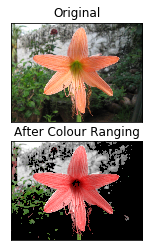

In [10]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

def color_ranging_hsv(img, h_c, h_bw, s_c, v_c):
    h1, h2 = get_range_values_h(h_c, h_bw)
    vectorize_ranging = np.vectorize(ranging_h)
    vectorize_ranging_sv = np.vectorize(ranging_sv)
    
    shape = img.shape
    new_img = np.zeros(shape[0]*shape[1]*shape[2]
                       ).reshape(shape[0], shape[1], shape[2])
    new_img[:, :, 0] = vectorize_ranging(img[:, :, 0], h1, h2)
    new_img[:, :, 1] = vectorize_ranging_sv(img[:, :, 1], s_c)
    new_img[:, :, 2] = vectorize_ranging_sv(img[:, :, 2], v_c)
    return new_img.astype(np.uint8)
#     return new_img


def get_range_values_h(l_c, l_bw):
    l1 = ( l_c - l_bw ) % 180
    l2 = ( l_c + l_bw ) % 180
    return l1, l2


def ranging_h(val, l1, l2):
    if l1 < l2 :
        if val <= l2 and val >= l1:
            return val
        else:
            return 0
    else:
        if   l1 <= val or l2  >= val:
            return val
        else:
            return 0
        
def ranging_sv(val, threshold):
    
    threshold = max(0,threshold)
    threshold = min(255,threshold)
    
    if val > threshold:
        return val
    else:
        return 0

image = cv.imread('orange-flower.ppm')
# image = cv.imread('orchid.ppm')
# image = cv.imread('wplane.ppm')


image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv =  cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
new_image_hsv = color_ranging_hsv(image_hsv, 60, 20, 50, 100)
# print(image_hsv[20:40,20:40,0])

# print(new_image_hsv[40:60,40:60,0])
new_image_rgb = cv.cvtColor(new_image_hsv, cv.COLOR_HSV2RGB) 
# print(new_image_rgb[:20,:20,0])

plot_images(image_rgb,new_image_rgb)

## Vector Median Filter

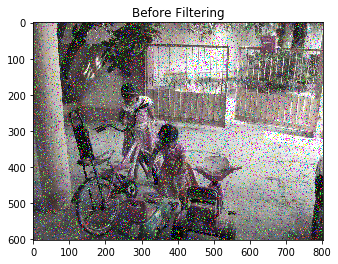

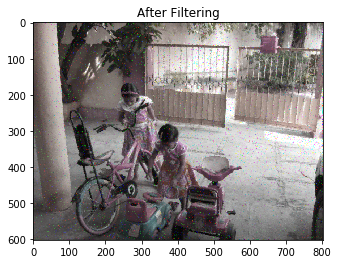

In [12]:
def add_padding(image):
    return cv2.copyMakeBorder( image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)

def euclidean_distance(vector, mean):
    return np.linalg.norm(vector-mean)
    
def vector_median_filter(image):
    new_image = image.copy()
    height, width = image.shape[0], image.shape[1]
    window = [[0,0,0]] * 9
    for x in range(1, height-1):  # ignore the edge pixels for simplicity (1 to width-1)
        for y in range(1, width-1): # ignore edge pixels for simplicity (1 to height-1)
            # top left pixel
            window[0] = image[x-1, y-1, :]
            window[1] = image[x-1, y, :]
            window[2] = image[x-1, y+1, :]
            window[3] = image[x, y-1, :]
            window[4] = image[x, y, :]
            window[5] = image[x, y+1, :]
            window[6] = image[x+1, y-1, :]
            window[7] = image[x+1, y, :]
            window[8] = image[x+1, y+1, :]
            mean = np.mean(window,axis=0)
            dist = []
            for i in range(9):
                dist.append(euclidean_distance(window[i], mean))
            min_dist_index = np.argmin(dist)
            new_image[x,y,:] = window[min_dist_index]
    plt.imshow(new_image)
    plt.title("After Filtering")
    plt.show()

    
image = cv2.imread('children-faded.ppm')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pad_rgb = add_padding(image_rgb)
plt.imshow(add_padding(image_rgb))
plt.title("Before Filtering")

plt.show()
# plt.imshow(image_rgb)
# plt.show()
# print(image_pad_rgb.shape)
# print(range(1,481))
vector_median_filter(image_pad_rgb)



## Median Filter (Gray Scale)

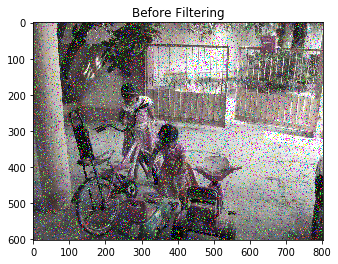

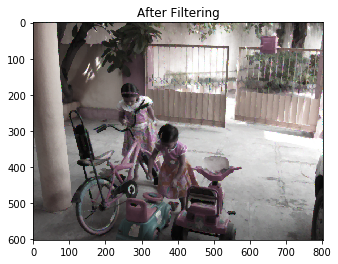

In [13]:
def add_padding(image):
    return cv2.copyMakeBorder( image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)

def euclidean_distance(vector, mean):
    return np.linalg.norm(vector-mean)
    
def median_filter(image):
    height, width = image.shape[0], image.shape[1]
    window = [0] * 9
    for _ in range(3):
        for x in range(1, height-1):  # ignore the edge pixels for simplicity (1 to width-1)
            for y in range(1, width-1): # ignore edge pixels for simplicity (1 to height-1)
                # top left pixel
                window[0] = image[x-1, y-1,_]
                window[1] = image[x-1, y, _]
                window[2] = image[x-1, y+1, _]
                window[3] = image[x, y-1, _]
                window[4] = image[x, y, _]
                window[5] = image[x, y+1, _]
                window[6] = image[x+1, y-1, _]
                window[7] = image[x+1, y, _]
                window[8] = image[x+1, y+1, _]
                image[x,y,_] = np.median(window)
    plt.imshow(image)
    plt.title("After Filtering")
    plt.show()

image = cv.imread('children-faded.ppm')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_pad_rgb = add_padding(image_rgb)
plt.imshow(add_padding(image_rgb))
plt.title("Before Filtering")
plt.show()
# plt.imshow(image_rgb)
# plt.show()
# print(image_pad_rgb.shape)
# print(range(1,481))
median_filter(image_pad_rgb)



## Sobel Vector Edge Detection

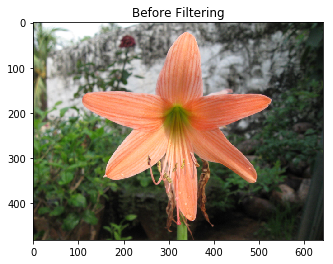

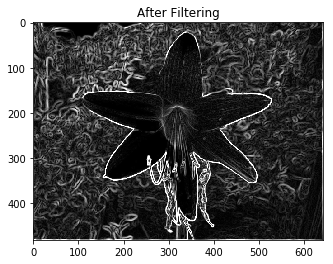

In [70]:
def add_padding(image):
    return cv2.copyMakeBorder( image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)

def sobel_edge_detector(image):
    sobel_x = [[-1,-2,-1],[0,0,0],[1,2,1]]
    sobel_y = [[-1,0,1],[-2,0,2],[-1,0,1]]
    height, width = image.shape[0], image.shape[1]
    new_image = image.copy()
    window = [[0,0,0]] * 3
#     for _ in range(1):
    for x in range(1, height-1):  # ignore the edge pixels for simplicity (1 to width-1)
        for y in range(1, width-1): # ignore edge pixels for simplicity (1 to height-1)
            # top left pixel
            window[0] = [image[x-1, y-1],image[x-1, y],image[x-1, y+1]]
            window[1] = [image[x, y-1],image[x, y],image[x, y+1]]
            window[2] = [image[x+1, y-1],image[x+1, y],image[x+1, y+1]]
            conv_val_x , conv_val_y = 0, 0
            conv_val_x = np.array(window)*np.array(sobel_x)
            conv_val_y = np.array(window)*np.array(sobel_y)
            new_image[x,y] = min(255,np.sqrt(conv_val_x.sum()**2+conv_val_y.sum()**2))
    plt.imshow(new_image,cmap="gray")
    plt.title("After Filtering")
    plt.show()

    
image = cv.imread('orange-flower.ppm')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(add_padding(image_rgb))
plt.title("Before Filtering")
plt.show()
image_rgb = image.max(axis=2)

image_pad_rgb = add_padding(image_rgb)

sobel_edge_detector(image_pad_rgb)



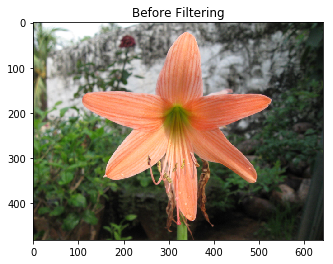

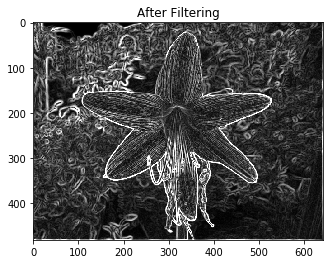

In [71]:
def add_padding(image):
    return cv2.copyMakeBorder( image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)

def sobel_edge_detector(image):
    sobel_x = [[-1,-2,-1],[0,0,0],[1,2,1]]
    sobel_y = [[-1,0,1],[-2,0,2],[-1,0,1]]
    height, width = image.shape[0], image.shape[1]
    new_image = image.copy()
    window = [[0]] * 3
    for _ in range(3):
        for x in range(1, height-1):  # ignore the edge pixels for simplicity (1 to width-1)
            for y in range(1, width-1): # ignore edge pixels for simplicity (1 to height-1)
                # top left pixel
                window[0] = [image[x-1, y-1,_],image[x-1, y,_],image[x-1, y+1,_]]
                window[1] = [image[x, y-1,_],image[x, y,_],image[x, y+1,_]]
                window[2] = [image[x+1, y-1,_],image[x+1, y,_],image[x+1, y+1,_]]
                conv_val_x , conv_val_y = 0, 0
                conv_val_x = np.array(window)*np.array(sobel_x)
                conv_val_y = np.array(window)*np.array(sobel_y)
                new_image[x,y,_] = min(255,np.sqrt(conv_val_x.sum()**2+conv_val_y.sum()**2))
    plt.imshow(new_image.max(axis=2),cmap="gray")
    plt.title("After Filtering")
    plt.show()

    
image = cv.imread('orange-flower.ppm')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_pad_rgb = add_padding(image_rgb)
plt.imshow(add_padding(image_rgb))
plt.title("Before Filtering")
plt.show()
sobel_edge_detector(image_pad_rgb)



In [56]:
import math
    
def vector_edge_detector(image):
    height, width = image.shape[0], image.shape[1]
    new_image = np.zeros(image.shape[:2])
    window = [[0,0,0]] * 3
#     for _ in range(1):
    for x in range(1, height-1):  # ignore the edge pixels for simplicity (1 to width-1)
        for y in range(1, width-1): # ignore edge pixels for simplicity (1 to height-1)
            # top left pixel
            c_x = image[x+1,y,:] - image[x,y,:]
            c_y = image[x,y+1,:] - image[x,y,:]
            
            
            c_xx = np.dot(c_x,c_x)
            c_yy = np.dot(c_y,c_y)
            c_xy = np.dot(c_x,c_y)
            
            theta = 0
            if c_xx != c_yy:
                theta = 0.5 * math.degrees(math.atan(2 *c_xy / (c_xx - c_yy)))
                
            magnitude = 0.5 * ((c_xx + c_yy) + (c_xx + c_yy)* math.cos(2 * theta) + 2 * c_xy * math.sin(theta))
            new_image[x,y] = magnitude
#             print(c_xx, c_yy, theta)
            
            
            
#             return
#             conv_val_x , conv_val_y = 0, 0
#             conv_val_x = np.array(window)*np.array(sobel_x)
#             conv_val_y = np.array(window)*np.array(sobel_y)
# #             print(window, end='\nThe end of window\n')
# #             print(conv_val_x.sum(),np.array(conv_val_y).sum())
# #             for k in range(3):
# #                 conv_val_x += np.array(window[k])*np.array(sobel_x[k])
# #                 conv_val_y += np.array(window[k])*np.array(sobel_y[k])
                
#             new_image[x,y] = min(255,np.sqrt(conv_val_x.sum()**2+conv_val_y.sum()**2))
#             image[x,y] = conv_val.sum()
    plt.imshow(new_image,cmap="gray")
    plt.title("After Filtering")
    plt.show()

    
image = cv.imread('orange-flower.ppm')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_pad_rgb = add_padding(image_rgb)
plt.imshow(add_padding(image_rgb))
plt.title("Before Filtering")
plt.show()
# plt.imshow(image_rgb)

# plt.show()
# print(image_pad_rgb.shape)
# print(range(1,481))
vector_edge_detector(image_pad_rgb)



[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
[[[  0  -2  -2]
  [  0   0   0]
  [  6  14   8]]

 [[ -9 -20 -11]
  [  0   0   0]
  [ 15  32  17]]

 [[-18 -38 -20]
  [  0   0   0]
  [ 24  50  26]]]


In [ ]:
image_rgb = cv.imread('Sudoku.jpg',0)
# image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
k=3
sobelx = cv2.Sobel(image_rgb,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image_rgb,cv2.CV_64F,0,1,ksize=5)

plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])


plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# for idx,sigma in enumerate([1.0,2.0,3.0,4.0]):
for idx,sigma in enumerate([1.0]):
    s1 = cv.GaussianBlur(image_rgb,(5,5),k*sigma)
    s2 = cv.GaussianBlur(image_rgb,(5,5),sigma)
    # multiply by sigma to get scale invariance
    dog = s1 - s2
    plt.subplot(1,3,1)
    plt.imshow(s1)
    plt.subplot(1,3,2)
    
    plt.imshow(s2)
    plt.subplot(1,3,3)
    
    plt.imshow(dog)
    
# plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))